# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Get URl and store
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Set empty lists to gather information
Cityname = []
Latlist = []
Lnglist = []
Maxtemplist = []
Humlist = []
Cloudlist = []
Windlist = []
Countrylist = []
Datelist = []

#Set index amount
Begin = 0
ChangeVary = 1


#Start loop to gather information
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get (query_url + city).json()
        Cityname.append(response["name"])
        Latlist.append(response["coord"]["lat"])
        Lnglist.append(response["coord"]["lon"])
        Maxtemplist.append(response["main"]["temp_max"])
        Humlist.append(response["main"]["humidity"])
        Cloudlist.append(response["clouds"]["all"])
        Windlist.append(response["wind"]["speed"])
        Countrylist.append(response["sys"]["country"])
        Datelist.append(response["dt"])
        if Begin > 49:
            Begin = 0
            ChangeVary = ChangeVary + 1
        
        else:
            Begin = Begin + 1
            print(f"Processing request number {Begin} of {ChangeVary} | {city}")     
        
    except(KeyError, IndexError):
        print("City not found.")
        
#I was having issues using the time.sleep(60) so instead I used if to reset after 50 iterations through the list

Processing request number 1 of 1 | sobolevo
City not found.
Processing request number 2 of 1 | ribeira grande
Processing request number 3 of 1 | amahai
Processing request number 4 of 1 | nanortalik
Processing request number 5 of 1 | kenitra
Processing request number 6 of 1 | los llanos de aridane
City not found.
Processing request number 7 of 1 | caravelas
Processing request number 8 of 1 | sitka
City not found.
Processing request number 9 of 1 | carnarvon
Processing request number 10 of 1 | lebu
Processing request number 11 of 1 | rosetta
Processing request number 12 of 1 | rikitea
Processing request number 13 of 1 | setermoen
City not found.
Processing request number 14 of 1 | voh
Processing request number 15 of 1 | albany
Processing request number 16 of 1 | barrow
Processing request number 17 of 1 | bluff
City not found.
Processing request number 18 of 1 | rawson
Processing request number 19 of 1 | sorong
Processing request number 20 of 1 | berlevag
Processing request number 21 of 1

In [5]:
#Save city results into dataframe
DateTime = pd.to_datetime(Datelist, unit='s')
Weatherdata = pd.DataFrame ({"City":Cityname, "Latitude":Latlist, "Longitude":Lnglist, 
                             "Maximum Temperature (F)":Maxtemplist,
                             "Humidity":Humlist, "Cloudiness":Cloudlist, 
                             "Wind Speed":Windlist, "Country":Countrylist,
                             "Date and Time":DateTime})
#Had to do a print line to see where I was missing data
#print (len(Cityname), len(Latlist), len(Lnglist), len(Maxtemplist),len(Humlist),len(Cloudlist),len(Windlist),len(Countrylist),len(Datelist))
Weatherdata.to_csv("Weatherdata.csv", index = False)
Weatherdata.head()


,City,Latitude,Longitude,Maximum Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date and Time
0,Sobolevo,54.4299,31.8996,42.96,70,12,5.73,RU,2022-05-22 19:21:36
1,Ribeira Grande,38.5167,-28.7000,64.80,100,75,2.30,PT,2022-05-22 19:21:37
2,Amahai,-3.3333,128.9167,77.83,87,99,1.90,ID,2022-05-22 19:21:37
3,Nanortalik,60.1432,-45.2371,37.51,98,100,6.85,GL,2022-05-22 19:21:37
4,Kenitra,34.2610,-6.5802,68.76,77,48,7.49,MA,2022-05-22 19:20:17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
Humidity_filter = Weatherdata[Weatherdata["Humidity"]>100]
print (Humidity_filter)
#There are no cities in our dataset that have a humidity over 100

Empty DataFrame
Columns: [City, Latitude, Longitude, Maximum Temperature (F), Humidity, Cloudiness, Wind Speed, Country, Date and Time]
Index: []


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

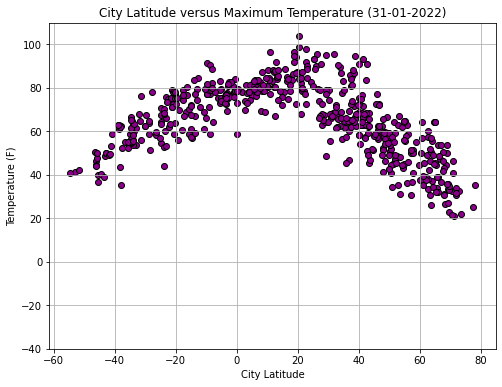

This graph is the comparison of the cities at their latitudes in comparison to the highest recorded temperature. Looking at the graph we can see there is a loose correlation between the two - the closer the latitude is to the equator the higher the temperature recorded.


In [9]:
plt.figure(figsize=(8,6))
plt.scatter(Weatherdata["Latitude"], Weatherdata ["Maximum Temperature (F)"], color = "darkmagenta", edgecolor = "black")
plt.title("City Latitude versus Maximum Temperature (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(-40,110)
plt.grid()
plt.show()
print ("This graph is the comparison of the cities at their latitudes in comparison to the highest recorded temperature. Looking at the graph we can see there is a loose correlation between the two - the closer the latitude is to the equator the higher the temperature recorded.")


## Latitude vs. Humidity Plot

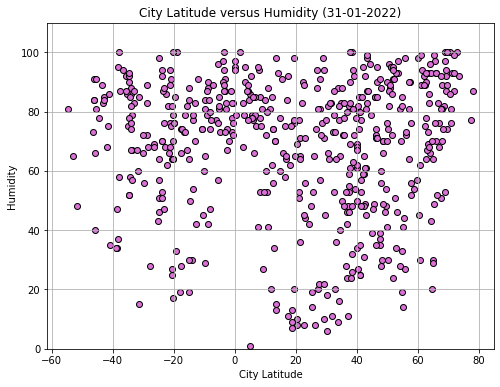

This graph is a comparison of the city latitudes and the recorded humidity. There is no discernible correlation between the two that can be seen from this graph.


In [10]:
plt.figure(figsize=(8,6))
plt.scatter(Weatherdata["Latitude"], Weatherdata ["Humidity"], color = "orchid", edgecolor = "black")
plt.title("City Latitude versus Humidity (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.ylim(0,110)
plt.grid()
plt.show()
print ("This graph is a comparison of the city latitudes and the recorded humidity. There is no discernible correlation between the two that can be seen from this graph.")


## Latitude vs. Cloudiness Plot

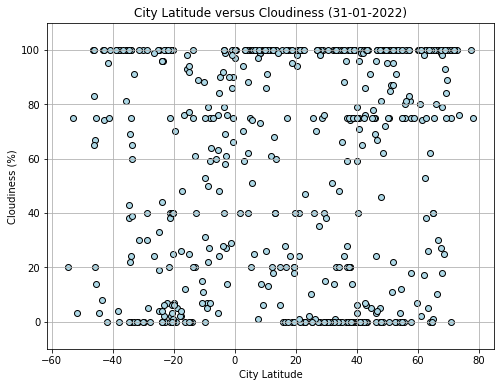

In the graph above we can see the city latitude in comparison to the cloudiness measured at each location. It does not look like there is any discernible correlation between the two variables.


In [15]:
plt.figure(figsize=(8,6))
plt.scatter(Weatherdata["Latitude"], Weatherdata ["Cloudiness"], color = "lightblue", edgecolor = "black")
plt.title("City Latitude versus Cloudiness (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,110)
plt.grid()
plt.show()
print("In the graph above we can see the city latitude in comparison to the cloudiness measured at each location. It does not look like there is any discernible correlation between the two variables.")


## Latitude vs. Wind Speed Plot

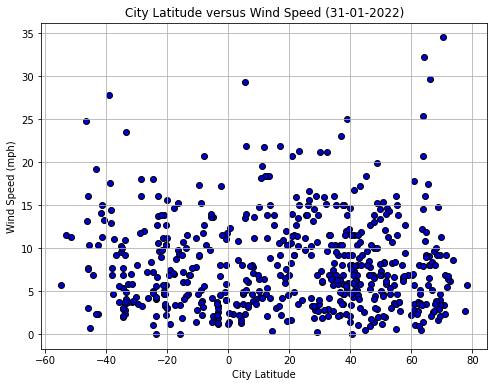

This graph shows city latitude and the wind speed measured at these locations. This chart has little to no correlation present between these two values. There are cities measured at similar latitudes that have very different wind speeds measured.


In [16]:
plt.figure(figsize=(8,6))
plt.scatter(Weatherdata["Latitude"], Weatherdata ["Wind Speed"], color = "mediumblue", edgecolor = "black")
plt.title("City Latitude versus Wind Speed (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print ("This graph shows city latitude and the wind speed measured at these locations. This chart has little to no correlation present between these two values. There are cities measured at similar latitudes that have very different wind speeds measured.")


## Linear Regression

In [17]:
Northdf = Weatherdata[Weatherdata["Latitude"]>=0]
Southdf = Weatherdata[Weatherdata["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6524914072031807


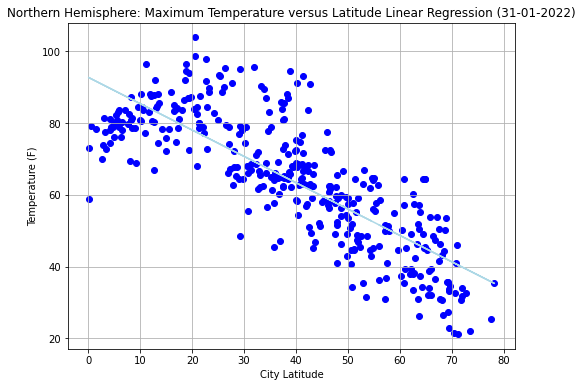

The graph below shows the northern hemisphere cities and the maximum temperatures recorded at these cities. Looking at our correlation coefficient of 0.787.. we can see there is a very strong correlation between the two.Using the equation we can see that for every degree a city moves up in latitude the temperature will drop by 1.35 degrees.


In [18]:
plt.figure(figsize=(8,6))
x_values = Northdf["Latitude"]
y_values = Northdf["Maximum Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "blue")
plt.plot(x_values,regress_values,color = "lightblue")
plt.annotate(line_eq,(6,10),fontsize=15,color = "purple")
plt.title("Northern Hemisphere: Maximum Temperature versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()
print("The graph below shows the northern hemisphere cities and the maximum temperatures recorded at these cities. Looking at our correlation coefficient of 0.787.. we can see there is a very strong correlation between the two."
      "Using the equation we can see that for every degree a city moves up in latitude the temperature will drop by 1.35 degrees.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6465130666356458


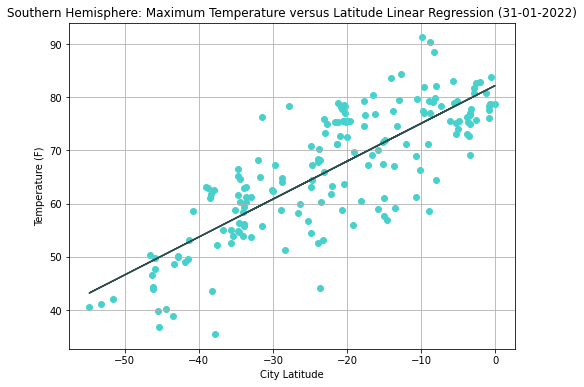

The graph below shows the southern hemisphere cities and the maximum temperatures recorded at these cities. Looking at our correlation coefficient of 0.084... we can see there is very little correlation between the two variables


In [19]:
plt.figure(figsize=(8,6))
x_values = Southdf["Latitude"]
y_values = Southdf["Maximum Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "mediumturquoise")
plt.plot(x_values,regress_values,color = "darkslategray")
plt.title("Southern Hemisphere: Maximum Temperature versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-50,95),fontsize=15,color = "darkslategray")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()
print ("The graph below shows the southern hemisphere cities and the maximum temperatures recorded at these cities. Looking at our correlation coefficient of 0.084... we can see there is very little correlation between the two variables")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017504813571904886


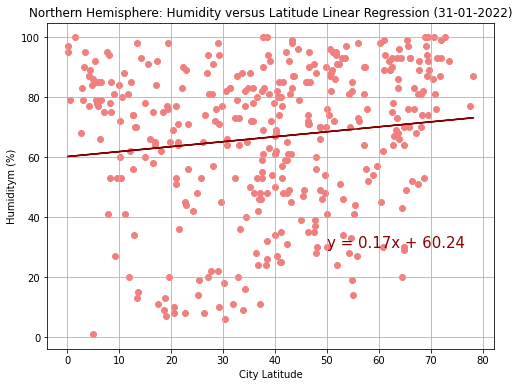

This graph below shows the northern hemisphere cities and the humidity measured at the locations. We can take a quick look at the graph to see there is no correlation between the two and we can back up our findings with our correlation coefficient. 


In [25]:
plt.figure(figsize=(8,6))
x_values = Northdf["Latitude"]
y_values = Northdf["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "lightcoral")
plt.plot(x_values,regress_values,color = "darkred")
plt.title("Northern Hemisphere: Humidity versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Humiditym (%)")
plt.annotate(line_eq,(50,30),fontsize=15,color = "darkred")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()
print ("This graph below shows the northern hemisphere cities and the humidity measured at the locations. We can take a quick look at the graph to see there is no correlation between the two and we can back up our findings with our correlation coefficient. ")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005460998183598248


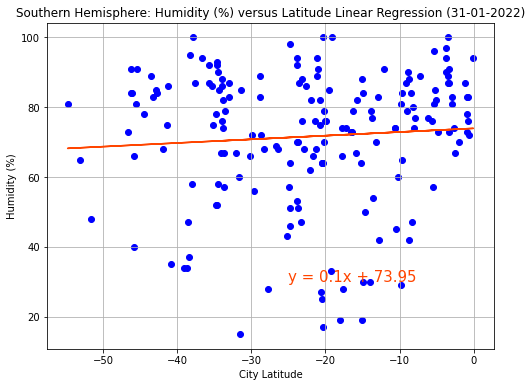

This graph below shows the southern hemisphere cities and the humidity measured at the locations. We can take a quick look at the graph to see there is no correlation between the two and we can back up our findings with our correlation coefficient. 


In [27]:
plt.figure(figsize=(8,6))
x_values = Southdf["Latitude"]
y_values = Southdf["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "blue")
plt.plot(x_values,regress_values,color = "orangered")
plt.title("Southern Hemisphere: Humidity (%) versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-25,30),fontsize=15,color = "orangered")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()
print ("This graph below shows the southern hemisphere cities and the humidity measured at the locations. We can take a quick look at the graph to see there is no correlation between the two and we can back up our findings with our correlation coefficient. ")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006317365945248952


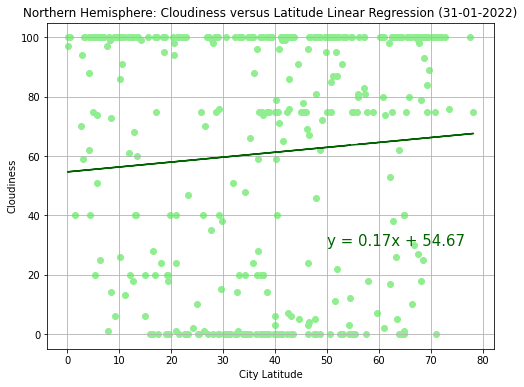

In [28]:
plt.figure(figsize=(8,6))
x_values = Northdf["Latitude"]
y_values = Northdf["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "lightgreen")
plt.plot(x_values,regress_values,color = "darkgreen")
plt.title("Northern Hemisphere: Cloudiness versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,30),fontsize=15,color = "darkgreen")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008527812890752773


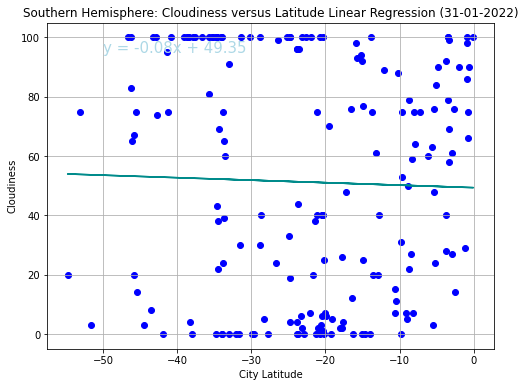

In [30]:
plt.figure(figsize=(8,6))
x_values = Southdf["Latitude"]
y_values = Southdf["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "blue")
plt.plot(x_values,regress_values,color = "darkcyan")
plt.title("Southern Hemisphere: Cloudiness versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,95),fontsize=15,color = "lightblue")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003148766545262527


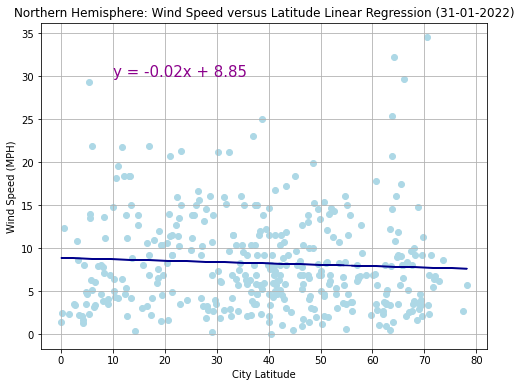

In [31]:
plt.figure(figsize=(8,6))
x_values = Northdf["Latitude"]
y_values = Northdf["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "lightblue")
plt.plot(x_values,regress_values,color = "darkblue")
plt.title("Northern Hemisphere: Wind Speed versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(10,30),fontsize=15,color = "darkmagenta")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.034349298210765614


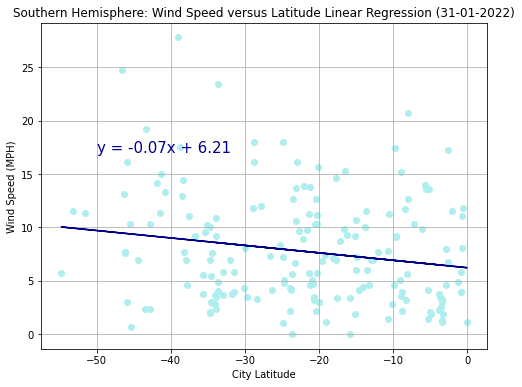

In [32]:
plt.figure(figsize=(8,6))
x_values = Southdf["Latitude"]
y_values = Southdf["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", facecolor = "paleturquoise")
plt.plot(x_values,regress_values,color = "darkblue")
plt.title("Southern Hemisphere: Wind Speed versus Latitude Linear Regression (31-01-2022)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(-50,17),fontsize=15,color = "darkblue")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()